In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:88% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

**<font size='6' color='red'>ch7. 시계열 분석</font>**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글설정
plt.rc('font',family='Malgun Gothic')  # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

In [3]:
df = pd.read_csv('data/일별평균대기오염도_2022(에어코리아).csv', encoding='cp949')
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0
2,20220101,행주,0.034,0.012,0.7,0.004,27.0,16.0
3,20220101,항동,0.030,0.011,0.5,0.003,27.0,14.0
4,20220101,한강대로,0.037,0.011,0.6,0.003,34.0,14.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [5]:
# df['측정일시'] : 20220101 => '2022-01-01' => datetime형으로 형변환(df['측정일'])
df['측정일'] = df['측정일시'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
 8   측정일           18250 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [6]:
df['측정일'] = df['측정일'].str[:4] + '-' + df['측정일'].str[4:6] + '-' + df['측정일'].str[6:]


In [7]:
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),측정일
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0,2022-01-01
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0,2022-01-01
2,20220101,행주,0.034,0.012,0.7,0.004,27.0,16.0,2022-01-01
3,20220101,항동,0.030,0.011,0.5,0.003,27.0,14.0,2022-01-01
4,20220101,한강대로,0.037,0.011,0.6,0.003,34.0,14.0,2022-01-01


In [8]:
df['측정일'] = pd.to_datetime(df['측정일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   측정일시          18250 non-null  int64         
 1   측정소명          18250 non-null  object        
 2   이산화질소농도(ppm)  18172 non-null  float64       
 3   오존농도(ppm)     18176 non-null  float64       
 4   일산화탄소농도(ppm)  18174 non-null  float64       
 5   아황산가스농도(ppm)  18176 non-null  float64       
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64       
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64       
 8   측정일           18250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 1.3+ MB


In [9]:
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),측정일
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0,2022-01-01
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0,2022-01-01
2,20220101,행주,0.034,0.012,0.7,0.004,27.0,16.0,2022-01-01
3,20220101,항동,0.030,0.011,0.5,0.003,27.0,14.0,2022-01-01
4,20220101,한강대로,0.037,0.011,0.6,0.003,34.0,14.0,2022-01-01


In [10]:
# 현재 컬럼 목록
cols = df.columns.tolist()
cols.remove('측정일')
cols

['측정일시',
 '측정소명',
 '이산화질소농도(ppm)',
 '오존농도(ppm)',
 '일산화탄소농도(ppm)',
 '아황산가스농도(ppm)',
 '미세먼지농도(㎍/㎥)',
 '초미세먼지농도(㎍/㎥)']

In [11]:
new_cols = [cols[0], '측정일'] +  cols[1:]
df = df[new_cols]
df.head()

,측정일시,측정일,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,2022-01-01,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,20220101,2022-01-01,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0
2,20220101,2022-01-01,행주,0.034,0.012,0.7,0.004,27.0,16.0
3,20220101,2022-01-01,항동,0.030,0.011,0.5,0.003,27.0,14.0
4,20220101,2022-01-01,한강대로,0.037,0.011,0.6,0.003,34.0,14.0


In [12]:
# 서울시 측정소명들
print('측정소명 갯수 : ', df['측정소명'].unique().shape[0])
print(df['측정소명'].unique())

측정소명 갯수 :  50
['강남구' '홍릉로' '행주' '항동' '한강대로' '청계천로' '천호대로' '중랑구' '중구' '종로구' '종로' '정릉로'
 '자연사박물관' '은평구' '용산구' '올림픽공원' '영등포로' '영등포구' '양천구' '신촌로' '시흥대로' '송파구' '세곡'
 '성북구' '성동구' '화랑로' '서초구' '서울숲' '서대문구' '북한산' '마포아트센터' '마포구' '동작대로' '동작구'
 '동대문구' '도산대로' '도봉구' '노원구' '남산' '금천구' '구로구' '광진구' '관악산' '관악구' '공항대로' '강서구'
 '강북구' '강변북로' '강동구' '강남대로']


In [13]:
loc_name = '강동구'
df_flt = df[df['측정소명']==loc_name]
df_flt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 48 to 18227
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   측정일시          365 non-null    int64         
 1   측정일           365 non-null    datetime64[ns]
 2   측정소명          365 non-null    object        
 3   이산화질소농도(ppm)  365 non-null    float64       
 4   오존농도(ppm)     365 non-null    float64       
 5   일산화탄소농도(ppm)  365 non-null    float64       
 6   아황산가스농도(ppm)  365 non-null    float64       
 7   미세먼지농도(㎍/㎥)   365 non-null    float64       
 8   초미세먼지농도(㎍/㎥)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 28.5+ KB


In [14]:
print(f'{loc_name} 데이터(df_flt) 갯수 : ', len(df_flt))
print(df_flt.info())

강동구 데이터(df_flt) 갯수 :  365
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 48 to 18227
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   측정일시          365 non-null    int64         
 1   측정일           365 non-null    datetime64[ns]
 2   측정소명          365 non-null    object        
 3   이산화질소농도(ppm)  365 non-null    float64       
 4   오존농도(ppm)     365 non-null    float64       
 5   일산화탄소농도(ppm)  365 non-null    float64       
 6   아황산가스농도(ppm)  365 non-null    float64       
 7   미세먼지농도(㎍/㎥)   365 non-null    float64       
 8   초미세먼지농도(㎍/㎥)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 28.5+ KB
None


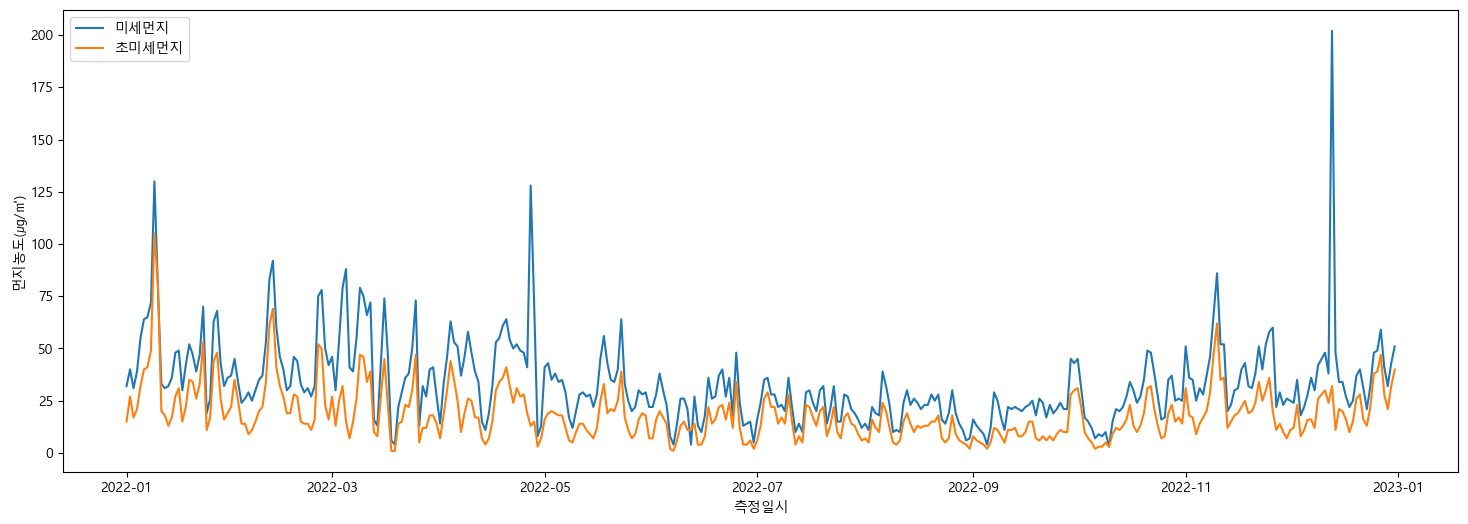

In [15]:
plt.figure(figsize=(18, 6))
plt.plot(df_flt['측정일'], df_flt['미세먼지농도(㎍/㎥)'], label='미세먼지')
plt.plot(df_flt['측정일'], df_flt['초미세먼지농도(㎍/㎥)'], label='초미세먼지')
plt.xlabel('측정일시')
plt.ylabel('먼지농도(㎍/㎥)')
plt.legend(loc='upper left')
plt.show()

In [16]:
df_flt2 = df_flt[['측정일', '미세먼지농도(㎍/㎥)']]
ts = df_flt2.set_index('측정일')
ts.head()

,미세먼지농도(㎍/㎥)
측정일,
2022-01-01,32.0
2022-01-02,40.0
2022-01-03,31.0
2022-01-04,39.0
2022-01-05,55.0


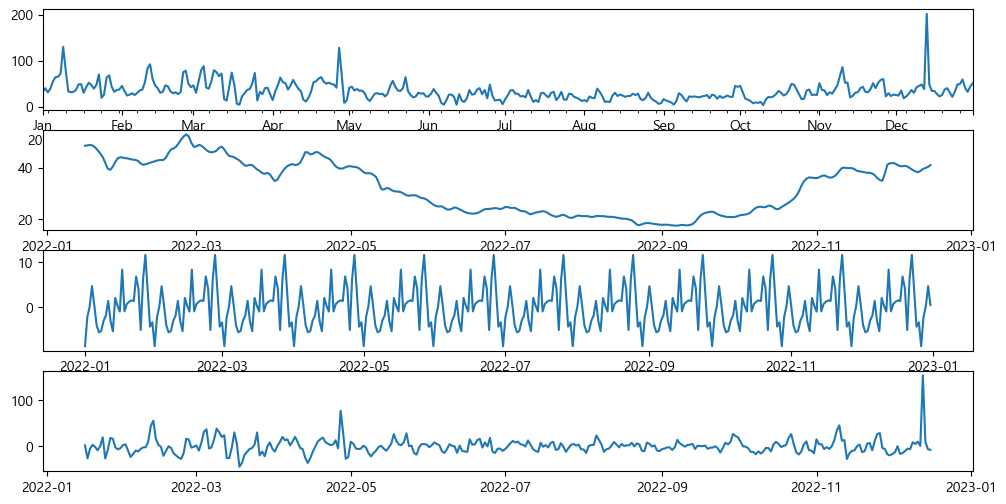

In [17]:
# 세계열 데이터 구조를 분해해 주는 도구
# 
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['미세먼지농도(㎍/㎥)'],
                           model='additive',  # 실제값 추세, 계정성, 잔차를 덧셈으로 분석
                           period=30, # 한달 단위로 계정성을 분석해봐
                           )
# result : 분석 결과
# result observed : 실제 데이터
# result.trend : 데이터의 장기적인 변화, 전반적으로 감소, 중가
# result.seasonal : 주기적인 계절성 패턴
# result.resid : 잔차(실제값에서 추세와 계절성을 뺀 노이즈)
fig, axes = plt.subplots(4, 1, figsize=(12,6))
#axes[0].plot(result.observed)
result.observed.plot(ax=axes[0])
axes[1].plot(result.trend)
axes[2].plot(result.seasonal)
axes[3].plot(result.resid)

In [18]:
def plot_seasonal_decompose(result):
    fig, axes = plt.subplots(4, 1, figsize=(12,6))
    result.observed.plot(ax=axes[0])
    axes[0].set_ylabel('관측값')
    axes[1].plot(result.trend)
    axes[1].set_ylabel('트렌드')
    axes[2].plot(result.seasonal)
    axes[2].set_ylabel('계절성')
    axes[3].plot(result.resid)
    axes[3].set_ylabel('잔차')
    plt.xlabel('날짜')
    plt.tight_layout()
    plt.show()

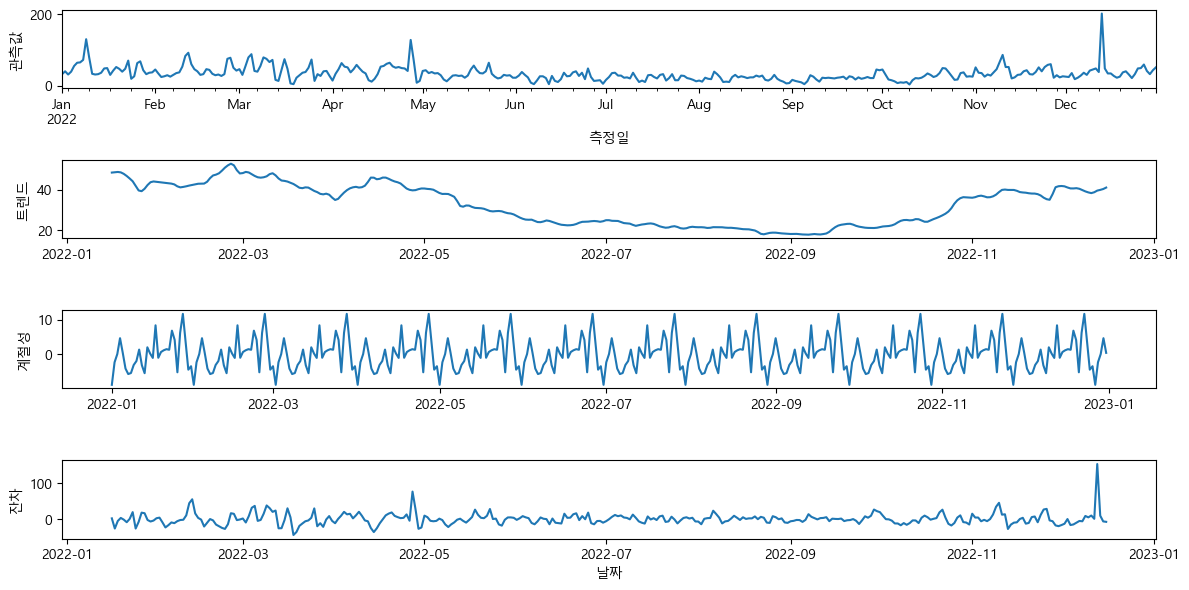

In [19]:
plot_seasonal_decompose(result)

## seasonal_decompose & RNN/LSTM/GRU & Prophet
```       통계적 분석                         예측                예측```
## Prophet
- 계절성, 추세, 휴일효과 등을 자동으로 모델링
- pip install prophet

In [20]:
df_flt2.head()

,측정일,미세먼지농도(㎍/㎥)
48,2022-01-01,32.0
97,2022-01-02,40.0
147,2022-01-03,31.0
150,2022-01-04,39.0
248,2022-01-05,55.0


In [21]:
df_flt2.columns = ['ds','y']  # prophet의 fit시 컬럼명을 ds, y
df_flt2

,ds,y
48,2022-01-01,32.0
97,2022-01-02,40.0
147,2022-01-03,31.0
150,2022-01-04,39.0
248,2022-01-05,55.0
...,...,...
18047,2022-12-27,59.0
18099,2022-12-28,41.0
18147,2022-12-29,32.0
18197,2022-12-30,43.0


In [22]:
from prophet import Prophet
p_model = Prophet()
p_model.fit(df_flt2)

Importing plotly failed. Interactive plots will not work.
17:30:03 - cmdstanpy - INFO - Chain [1] start processing
17:30:03 - cmdstanpy - INFO - Chain [1] done processing


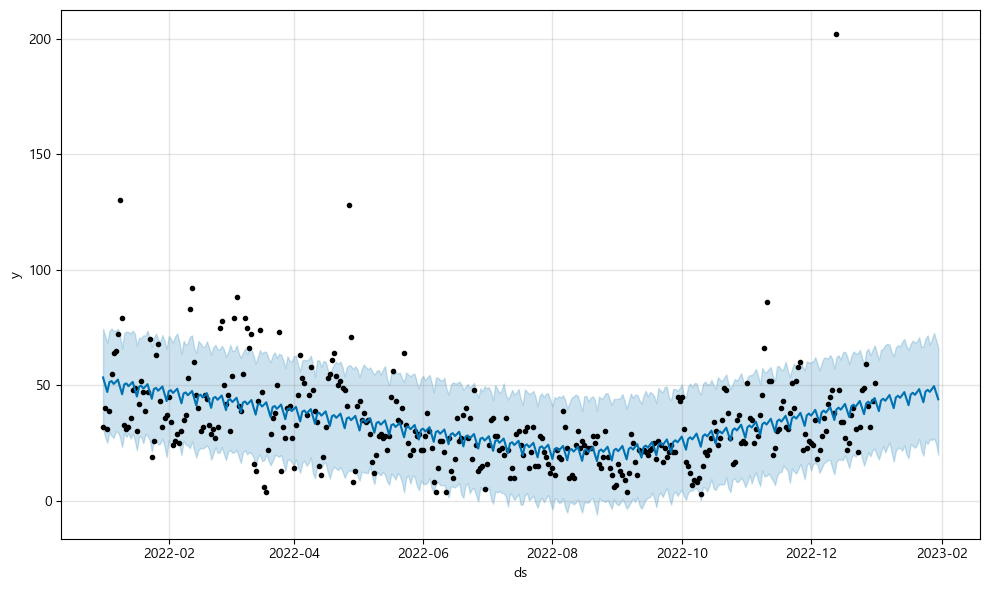

In [23]:
# p_model을 이용하여 30일 이후의 데이터를 예측
future = p_model.make_future_dataframe(periods=30)
forecast = p_model.predict(future)
f = p_model.plot(forecast)

In [24]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
365,2023-01-01,41.578586,19.861757,63.996421
366,2023-01-02,38.808982,17.941825,61.126672
367,2023-01-03,43.400036,21.019318,65.323882
368,2023-01-04,44.173447,23.833860,65.757540
369,2023-01-05,43.289239,20.893012,67.392989
370,2023-01-06,44.489143,23.196879,67.975558
371,2023-01-07,45.781103,25.342420,67.510004
372,2023-01-08,42.862549,20.919470,64.442195
373,2023-01-09,40.092945,16.959813,62.597039
374,2023-01-10,44.683999,21.533305,66.517166


In [25]:
forecast.loc[forecast['ds']=='2023-01-16', ['yhat', 'yhat_lower','yhat_upper']]

,yhat,yhat_lower,yhat_upper
380,41.376908,18.457289,65.285524
